In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO
import re
import os

# Initialize an empty list to collect DataFrames
all_dataframes = []

# Loop through years 2015 to 2025
for year in range(2015, 2026):
    filename = f"t05st09_2_e_{year}.html"
    if os.path.exists(filename):
        try:
            with open(filename, "r", encoding="big5", errors="ignore") as file:
                soup = BeautifulSoup(file, "html.parser")

            html_io = StringIO(str(soup))
            tables = pd.read_html(html_io)

            if len(tables) > 2:
                df = tables[2]
                df.dropna(how='all', inplace=True)
                df = df[df[df.columns[0]] != df.columns[0]]
                df.iloc[:, 0] = df.iloc[:, 0].fillna("Company").replace("", "Company")
                df.columns = df.iloc[1]  # Set second row as header
                df = df[2:]              # Remove the first two rows
                df.reset_index(drop=True, inplace=True)
                df.insert(0, "Year", str(year))
                all_dataframes.append(df)
        except Exception as e:
            print(f"Failed to process {filename}: {e}")

# Concatenate all DataFrames
if all_dataframes:
    combined_df = pd.concat(all_dataframes, ignore_index=True)
    combined_df.to_csv("taiwan_stock_dividends_2015_2025.csv", index=False)
    print("Combined CSV file 'all_years_taiwan_stock_dividends.csv' has been created successfully.")
else:
    print("No valid files found to process.")


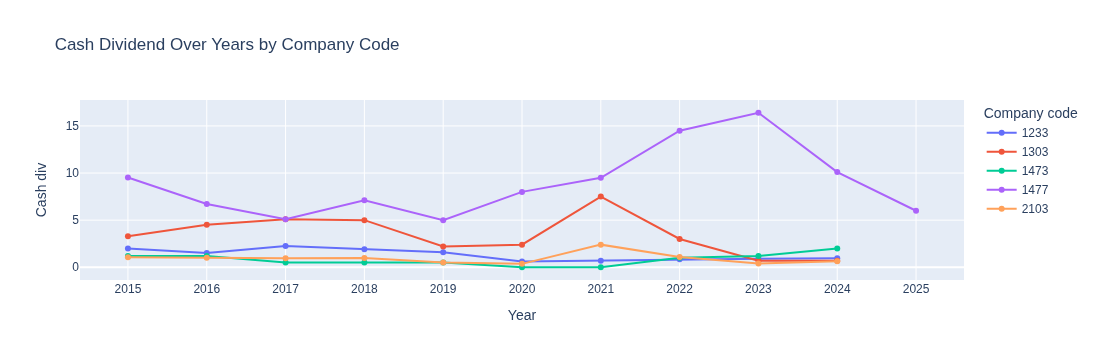

In [236]:
import plotly.express as px

# mylist
stock_list = ['1233','1303','1473','1477','2103']

# dividend > 0.5 and less std err and alpha = std_err / dividend
#stock_list = ['9925','9908','1726','9908','2412']
#stock_list = ['1203','1231','1769','2886','1234']
#stock_list = ['5876','2356','2433','6697']
#stock_list = ['1817','1775','9937','2245','3611']
#stock_list = ['4938','9941','2114','6281']
#stock_list = ['1264','2741','8416','9924','4549']
#stock_list = ['8083','4105','8048','1788','1707']
#stock_list = ['8435','1702','8109','1232','1737']
#stock_list = ['9926','5243','2894','1537','4104']
#stock_list = ['5878','8370','8464']

df_pic = combined_df[combined_df['Company code'].isin(stock_list)]
df_pic_rename = df_pic.rename(columns={'Cash dividends distributed from retained earnings (NTD/share)' : 'Cash div'})
df_pic_year_cash_div = df_pic_rename[['Company code','Year','Cash div']]
df_pic_year_cash_div.loc[:,'Cash div'] = df_pic_year_cash_div['Cash div'].astype(float)
df_pic_year_cash_div.to_csv('dividend_year_1233_1303_1473_2103.csv')
# Create a line chart of Cash Dividend over Years for each Company Code
fig = px.line(df_pic_year_cash_div, x='Year', y='Cash div', color='Company code',
              title='Cash Dividend Over Years by Company Code',
              markers=True)
fig.show()

In [ ]:
dividend_min = 10

df_pic = combined_df.sort_values(by='Year')
df_pic_rename = df_pic.rename(columns={'Cash dividends distributed from retained earnings (NTD/share)' : 'Cash div'})
df_filtered = df_pic_rename[['Company code','Year','Cash div']]
df_filtered.loc[:,'Cash div'] = df_filtered['Cash div'].astype(float)

# Calculate average cash dividend for each stock
avg_divs = df_filtered.groupby('Company code')['Cash div'].mean()

# Filter stocks with average cash dividend > 0.5
valid_stocks = avg_divs[avg_divs > dividend_min].index

# Filter the original data to include only valid stocks
df_valid = df_filtered[df_filtered['Company code'].isin(valid_stocks)]

# Calculate and sort standard deviation of cash dividends for valid stocks
std_devs = df_valid.groupby('Company code')['Cash div'].std().sort_values()

std_devs_filtered = std_devs.dropna()
std_devs_filtered = std_devs_filtered[std_devs_filtered != 0]
print("Standard deviations of yearly cash dividends (average > 0.5, sorted from low to high):")
print(std_devs_filtered)

In [ ]:
type(std_devs_filtered)

In [ ]:
# Calculate average and standard deviation of cash dividends for each stock
stats = df_filtered.groupby('Company code')['Cash div'].agg(['mean', 'std'])

# Filter stocks with average cash dividend > 0.5
stats_filtered = stats[stats['mean'] > 0.5].sort_values(by='std')

# Rename columns for clarity
stats_filtered = stats_filtered.rename(columns={'mean': 'Average Dividend', 'std': 'Standard Deviation'})

# Display the result table
print("Company Code | Average Dividend | Standard Deviation")
print(stats_filtered)
stats_filtered.to_csv('dividend_average_std_2025-09.csv')

In [ ]:
stats_filtered['alpha'] = stats_filtered['Standard Deviation'] / stats_filtered['Average Dividend']
stats_filtered_sort = stats_filtered.sort_values(by='alpha')
stats_filtered_sort.to_csv('dividend_alpha.csv')

In [ ]:
stats_filtered_sort[0:30].index

In [ ]:
import plotly.express as px

stock_list = ['1550']
df_pic = combined_df[combined_df['Company code'].isin(stock_list)]
df_pic_rename = df_pic.rename(columns={'Cash dividends distributed from retained earnings (NTD/share)' : 'Cash div'})
df_pic_year_cash_div = df_pic_rename[['Company code','Year','Cash div']]
df_pic_year_cash_div.loc[:,'Cash div'] = df_pic_year_cash_div['Cash div'].astype(float)
# Create a line chart of Cash Dividend over Years for each Company Code
fig = px.line(df_pic_year_cash_div, x='Year', y='Cash div', color='Company code',
              title='Cash Dividend Over Years by Company Code',
              markers=True)
fig.show()

In [ ]:
stock = pd.read_csv('../stock.csv')
stock.rename(columns={'sid':'Company code'},inplace=True)
#stock['Company code'] = df['Company code'].astype(str)
stock.set_index('Company code',inplace=True)
stock.to_csv('stock_modified.csv')
stock.info()

In [ ]:
stats_filtered_sort.join(stock).to_csv('dividend_alpha_join.csv')

In [ ]:
stats_filtered_sort.info()

In [ ]:
df_filtered[['Company code','Cash div']].groupby('Company code').count() > 8

In [ ]:
record_count = 10
x = df_filtered[['Company code','Cash div']].groupby('Company code').count() >= record_count

In [ ]:
type(x)

In [ ]:
x.info()

In [ ]:
y=x[x['Cash div'] == True].index

In [ ]:
y

In [ ]:
type(y)

In [ ]:
x.info()

In [272]:
# Load stock and group data
stock_df = pd.read_csv("../stock.csv", skipinitialspace=True)
group_df = pd.read_csv("../group.csv", skipinitialspace=True)

# Convert 'sid' and 'gid' to string for consistency
stock_df['sid'] = stock_df['sid'].astype(str)
stock_df['gid'] = stock_df['gid'].astype(str)
group_df['gid'] = group_df['gid'].astype(str)


data = pd.DataFrame({'sid': [
    '9925','9908','1726','2412',
    '1203','1231','1769','2886','1234',
    '5876','2356','2433','6697','1817',
    '1775','9937','2245','3611','4938',
    '9941','2114','6281','1264','2741',
    '8416','9924','4549','8083','4105',
    '8048','1788','1707','8435','1702',
    '8109','1232','1737','9926','5243',
    '2894','1537','4104','5878','8370',
    '8464']})

# Merge with stock data to get gid and sname
merged_df = data.merge(stock_df, on='sid', how='left')

# Merge with group data to get gcname and gname
final_df = merged_df.merge(group_df, on='gid', how='left')

# Display or export the final DataFrame
print(final_df)
final_df.to_csv("dividend_gid_cname.csv")

     sid  gid sname     gcname                              gname
0   9925   20    新保        其他類                             Others
1   9908   23   大台北      油電燃氣類            Oil Gas and Electricity
2   1726   21    永記      化學工業類                           Chemical
3   2412   27   中華電     通信網路業類        Communications and Internet
4   1203    2    味王      食品工業類                              Foods
5   1231    2   聯華食      食品工業類                              Foods
6   1769  NaN   NaN        NaN                                NaN
7   2886   17   兆豐金      金融保險類              Finance and Insurance
8   1234    2    黑松      食品工業類                              Foods
9   5876   17  上海商銀      金融保險類              Finance and Insurance
10  2356   25   英業達  電腦及週邊設備業類  Computer and Peripheral Equipment
11  2433   31   互盛電     其他電子業類                   Other Electronic
12  6697  NaN   NaN        NaN                                NaN
13  1817    8   凱撒衛      玻璃陶瓷類                 Glass and Ceramics
14  1775  

In [273]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gid     949 non-null    int64 
 1   sid     949 non-null    object
 2   sname   949 non-null    object
dtypes: int64(1), object(2)
memory usage: 22.4+ KB


In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sid     45 non-null     object
dtypes: object(1)
memory usage: 492.0+ bytes


In [275]:
div_df = pd.read_csv("dividend_gid_cname.csv", skipinitialspace=True)

In [278]:
div_df.dropna().sort_values('gcname')

,Unnamed: 0,sid,gid,sname,gcname,gname
11,11,2433,31.0,互盛電,其他電子業類,Other Electronic
0,0,9925,20.0,新保,其他類,Others
19,19,9941,20.0,裕融,其他類,Others
2,2,1726,21.0,永記,化學工業類,Chemical
25,25,9924,38.0,福興,居家生活類,Household
44,44,8464,38.0,億豐,居家生活類,Household
20,20,2114,11.0,鑫永銓,橡膠工業類,Rubber
37,37,9926,23.0,新海,油電燃氣類,Oil Gas and Electricity
1,1,9908,23.0,大台北,油電燃氣類,Oil Gas and Electricity
15,15,9937,23.0,全國,油電燃氣類,Oil Gas and Electricity
